In [1]:
import sys
import importlib
import datetime

import numpy as np
import pandas as pd
import xarray as xr
import pvlib as pv
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filters
from distributed import LocalCluster, Client

In [2]:
sys.path.append('/home/travis/python_code/letkf_forecasting/')
import random_functions as rf

In [ ]:
%matplotlib inline

In [3]:
%matplotlib notebook

In [4]:
importlib.reload(rf)

<module 'random_functions' from '/home2/travis/python_code/letkf_forecasting/random_functions.py'>

In [27]:
importlib.reload(rf)
tol = 0.005
x = np.arange(0, 119.5, .25)
y = np.arange(0, 98.25, .25)
Lx = 20
Ly = Lx
e, v = rf.eig_2d_covariance(x, y, Lx, Ly, tol)
print(e.size)

15


In [28]:
sample_num = 500
normal = np.random.randn(e.size, sample_num)
sample = v.dot((np.sqrt(e[:, None])*normal))
sample = sample.reshape(y.size, x.size, sample_num)

<IPython.core.display.Javascript object>


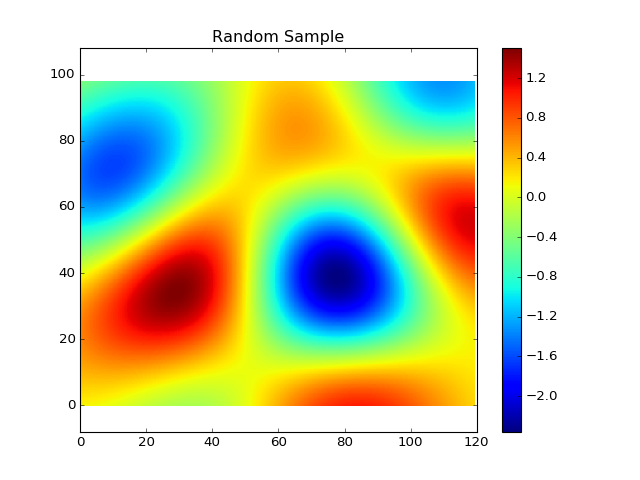

<IPython.core.display.Javascript object>


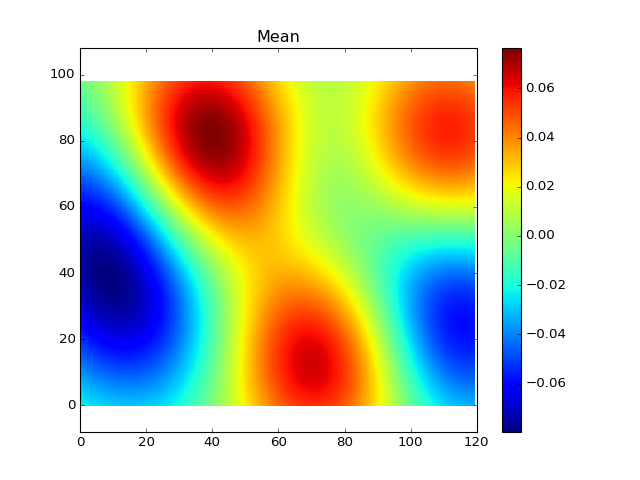

<IPython.core.display.Javascript object>


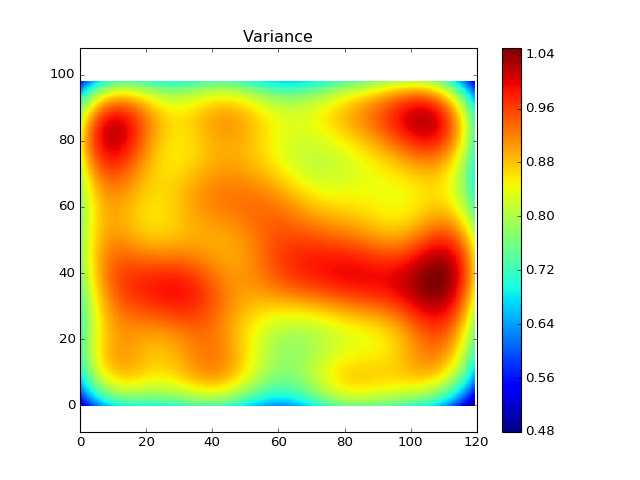

(0.0, 120.0, 0.0, 100.0)

In [33]:
for sn in range(1):
    plt.figure()
    im = plt.pcolormesh(x, y, sample[:, :, sn])
    plt.colorbar(im)
    plt.title('Random Sample')
    plt.axis('equal')

plt.figure()
im = plt.pcolormesh(x, y, sample.mean(axis=2))
plt.colorbar(im)
plt.title('Mean')
plt.axis('equal')

plt.figure()
im = plt.pcolormesh(x, y, sample.var(axis=2))
plt.colorbar(im)
plt.title('Variance')
plt.axis('equal')

In [30]:
sample.var(axis=2).mean()

0.87999096656190468

In [31]:
this = (v*e[None, :]*v).sum(-1)
print(this)
print(this.mean())

[ 0.53021936  0.53665613  0.54303909 ...,  0.54303909  0.53665613
  0.53021936]
0.908991488375


<IPython.core.display.Javascript object>


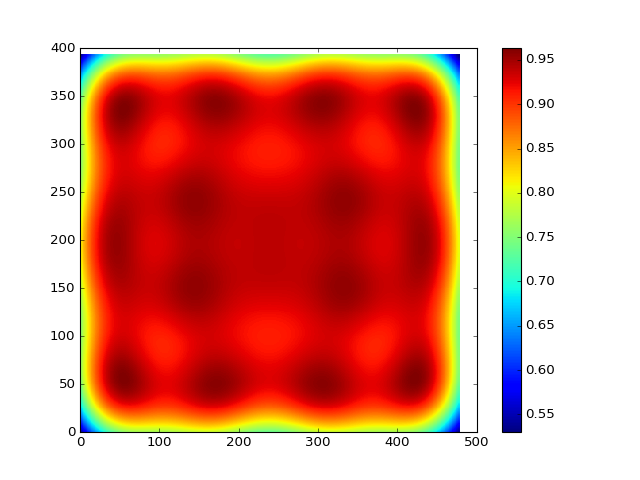

In [32]:
plt.figure()
im = plt.pcolormesh(this.reshape(y.size, x.size))
plt.colorbar(im)